In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from tensorflow import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout,SeparableConv2D, Activation, BatchNormalization, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

import librosa
import librosa.display
import librosa.display
import os
import IPython.display as ipd

In [2]:
general_path = '../input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


## Sound and Audio

To digitize a sound wave we must turn the signal into a series of numbers so that we can input it into our models. This is done by measuring the amplitude of the sound at fixed intervals of time.
Each such measurement is called a sample, and the sample rate is the number of samples per second. For instance, a common sampling rate is about 44,100 samples per second. That means that a 10-second music clip would have 441,000 samples! We will use librosa library which measures sample rate as 22,050 per second.

In [3]:
# Checking a random file.
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00023.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', len(y)/sr)

y: [-0.05004883 -0.04971313  0.04592896 ...  0.07028198  0.06604004
  0.04412842] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [4]:
# Trim leading and trailing silence from an audio signal 
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))
print('Check Len of Audio:', len(audio_file)/sr)

Audio File: [-0.05004883 -0.04971313  0.04592896 ...  0.07028198  0.06604004
  0.04412842] 

Audio File shape: (661794,)
Check Len of Audio: 30.013333333333332


### Sound Waves 2D Representation

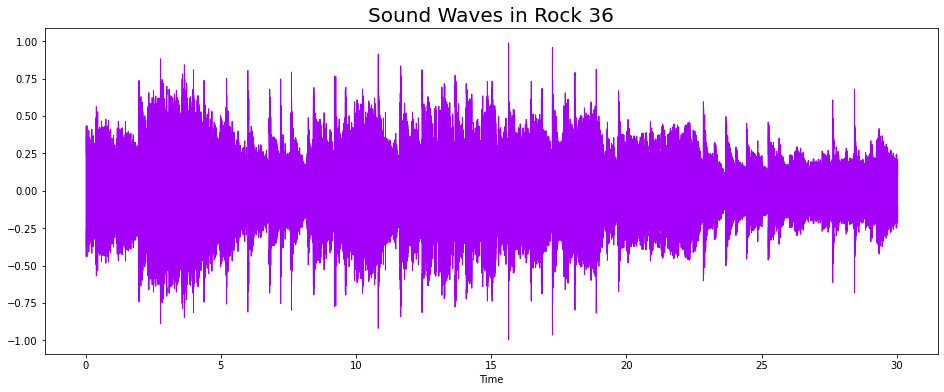

In [5]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Rock 36", fontsize = 20);

### We can listen to the audio with this code block.


In [6]:
import IPython.display as ipd
ipd.Audio(f'{general_path}/genres_original/rock/rock.00036.wav')

### Fourier Transform

* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
* Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.
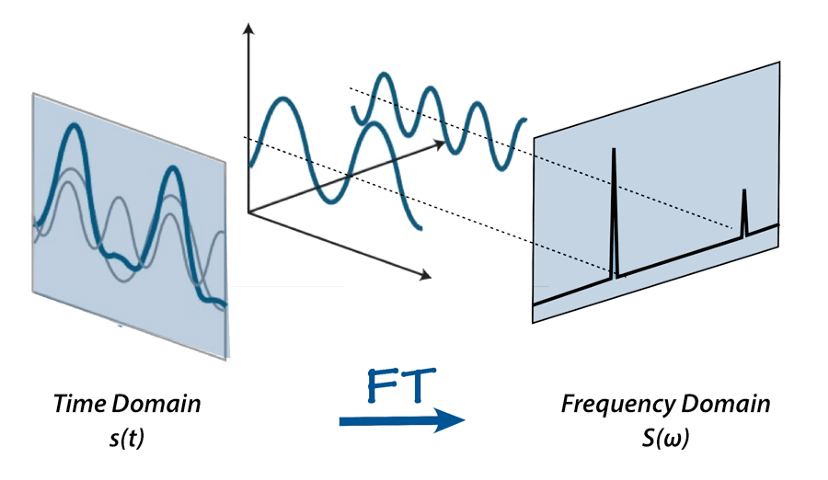

Shape of D object: (1025, 1293)


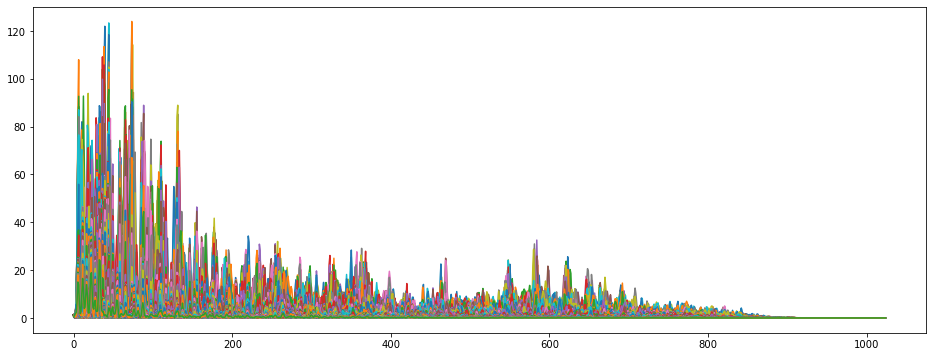

In [7]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns 

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D);

### The Spectrogram

* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams. In 2-dimensional arrays, the first axis is frequency while the second axis is time. ([see](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8)).

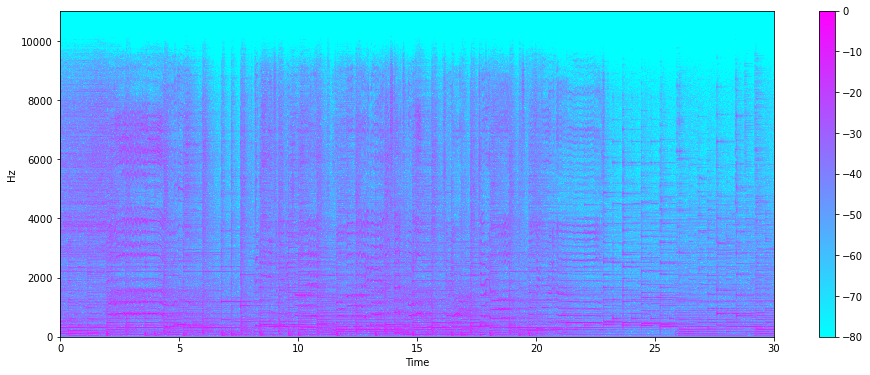

In [8]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'hz',
                        cmap = 'cool')
plt.colorbar();

### Mel Spectrogram

* The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.034729    0.07818604  0.0899353  ... -0.17190552 -0.19494629
 -0.19726562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


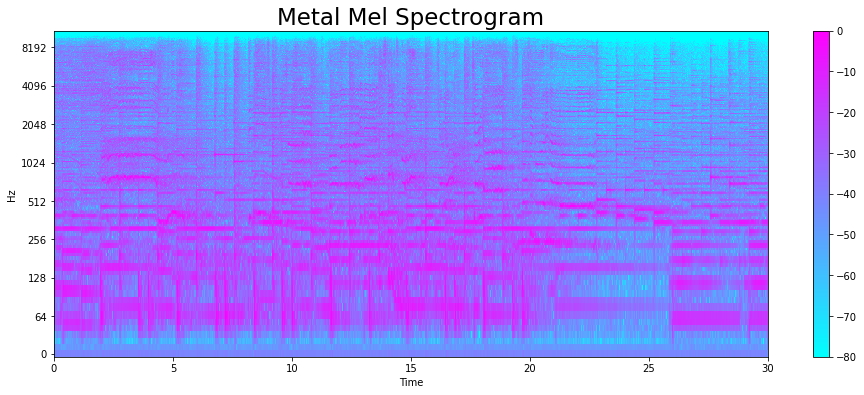

In [9]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.00167847  0.00393677  0.00320435 ... -0.00067139 -0.00082397
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


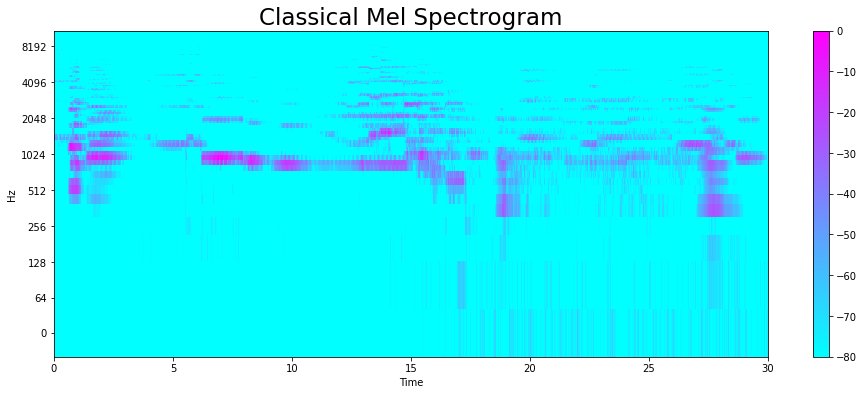

In [10]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

### Zero Crossing Rate

* the rate of sign-changes along with a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

In [11]:
# Total zero_crossings a song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

76585


### Mel-Frequency Cepstral Coefficients (MFCC):

* The MFCC summarizes the frequency disribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. The frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.05004883 -0.04971313  0.04592896 ...  0.07028198  0.06604004
  0.04412842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


mfccs shape: (20, 1293)


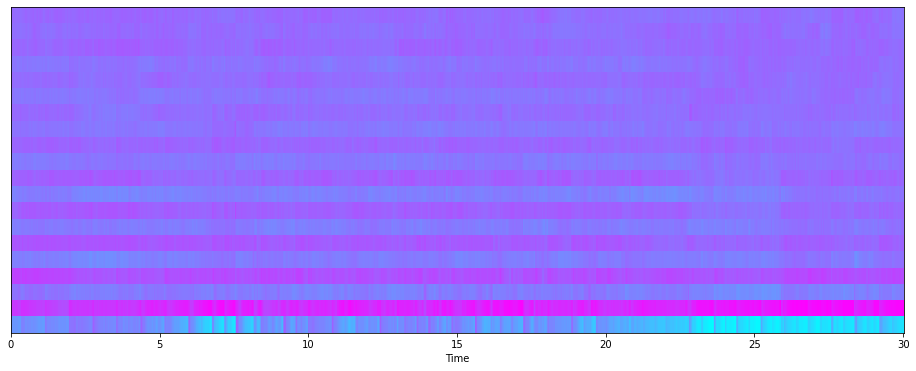

In [12]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled.

Mean: 2.9502685e-09 

Var: 1.0000001


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


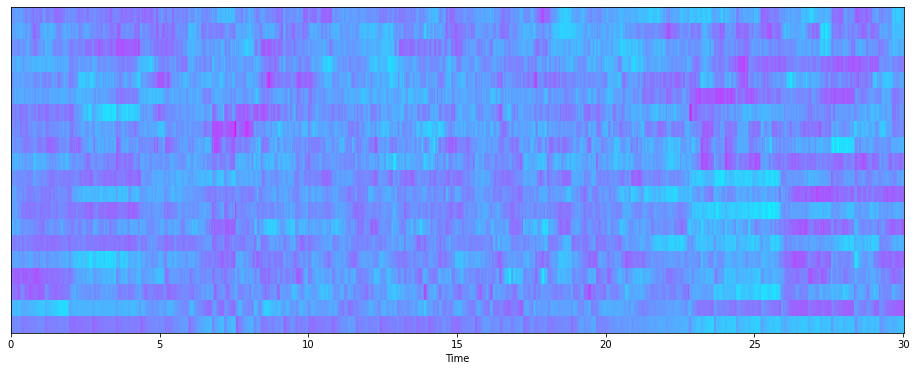

In [13]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

## EDA

EDA is going to be performed on the `features_30_sec.csv`. This file contains the mean and variance for each audio file for the features analysed above. 

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [14]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


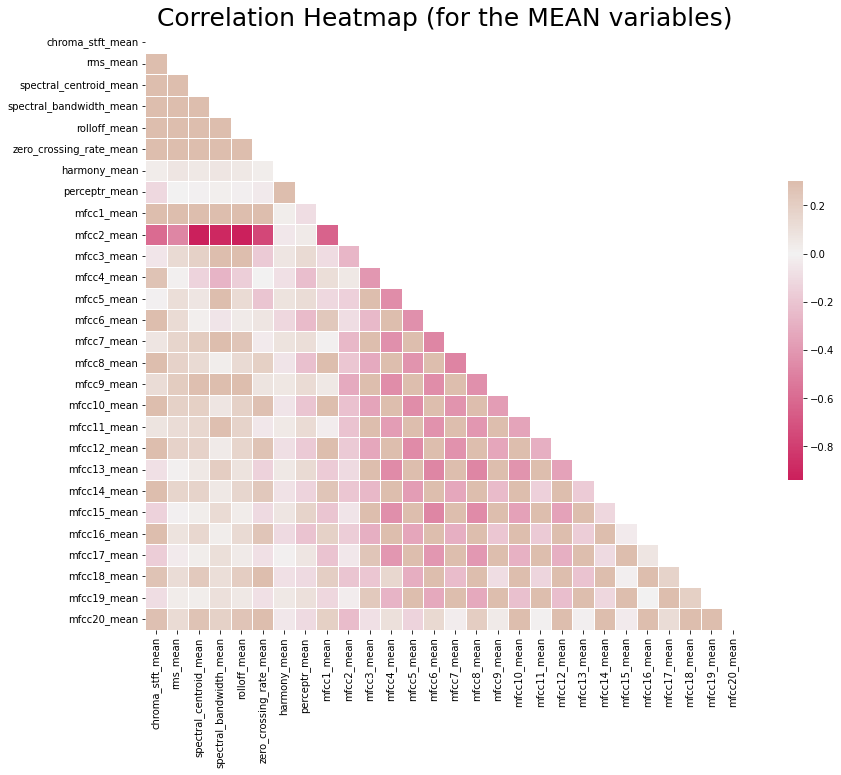

In [15]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Principal Component Analysis - to visualize possible groups of genres

1. Normalization
2. PCA
3. The Scatter Plot

In [16]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

finalDf


,principal component 1,principal component 2,label
0,-0.394827,-0.115015,blues
1,0.050684,-0.271071,blues
2,-0.479969,-0.223169,blues
3,0.015376,-0.440066,blues
4,-0.162281,-0.508224,blues
...,...,...,...
995,-0.754686,-0.037197,rock
996,-0.810911,-0.028770,rock
997,-0.845392,-0.004622,rock
998,-0.235744,-0.372051,rock


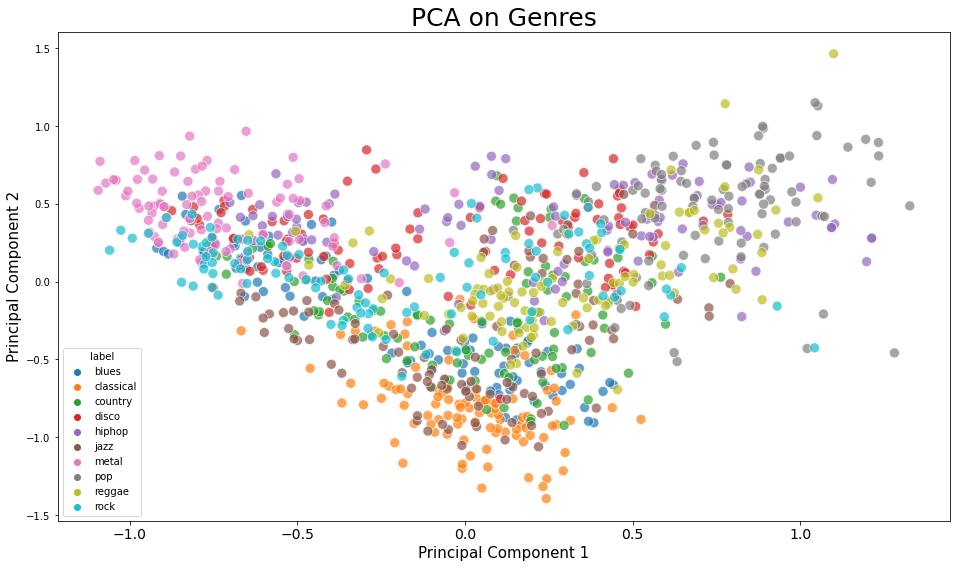

In [17]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning Classification

Using the `features_3_sec.csv` file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.


In [18]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Features and Target variable

* creates the target and feature variables
* normalizes the data

In [19]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

x = np.array(X, dtype = float)
x = scaler.fit_transform(X)
y = encoder.fit_transform(y)
x.shape, y.shape

((9990, 58), (9990,))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6693, 58), (3297, 58), (6693,), (3297,))

### Creating a predefined function to assess the accuracy and f1scores of a model

* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals

In [21]:
from sklearn.metrics import f1_score
from sklearn import metrics

def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5))

    #calculating the f1 scores
    macro_f1 = f1_score(y_test, preds, average='macro')
    micro_f1 = f1_score(y_test, preds, average='micro')
    weighted_f1 = f1_score(y_test, preds, average='weighted')
    print('Macro F1: ', macro_f1)
    print('Micro F1: ', micro_f1)
    print('Weighted F1: ', weighted_f1, '\n')


### We are trying with different models to achieve the best results.

In [22]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

# Bagging Classifier (Decision Tree)
bgg = BaggingClassifier(base_estimator =DecisionTreeClassifier(),
                          n_estimators = 1000,
                          random_state = 0)
model_assess(bgg, "Bagging Classifier")

Accuracy Naive Bayes : 0.51532
Macro F1:  0.4968505845080107
Micro F1:  0.5153169548074007
Weighted F1:  0.4979692045628165 

Accuracy Stochastic Gradient Descent : 0.66151
Macro F1:  0.6618150736713518
Micro F1:  0.6615104640582348
Weighted F1:  0.6621633435387866 

Accuracy KNN : 0.79527
Macro F1:  0.795849242434391
Micro F1:  0.7952684258416742
Weighted F1:  0.7956012288507411 

Accuracy Decission trees : 0.64089
Macro F1:  0.6407825387153608
Micro F1:  0.6408856536245071
Weighted F1:  0.6412367878057939 

Accuracy Random Forest : 0.80346
Macro F1:  0.8016874311777368
Micro F1:  0.8034576888080073
Weighted F1:  0.8016885824259135 

Accuracy Support Vector Machine : 0.84774
Macro F1:  0.8471443895988902
Micro F1:  0.8477403700333637
Weighted F1:  0.8471876623634131 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Logistic Regression : 0.72915
Macro F1:  0.7269207283921469
Micro F1:  0.7291477100394298
Weighted F1:  0.7265813878190565 

Accuracy Cross Gradient Booster : 0.89991
Macro F1:  0.8997405689211672
Micro F1:  0.899909008189263
Weighted F1:  0.8998349103525752 

Accuracy Cross Gradient Booster (Random Forest) : 0.75463
Macro F1:  0.7522723895419585
Micro F1:  0.7546254170457992
Weighted F1:  0.7525038691073008 

Accuracy Bagging Classifier : 0.84865
Macro F1:  0.8477929803763395
Micro F1:  0.848650288140734
Weighted F1:  0.8478880328221563 



### We are going to implement CNN to see if we can get better results.

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50)
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((1648, 58), (1649, 58), (1648,), (1649,))

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation='softmax'),
  
    
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(
    ),loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

2023-01-30 14:38:09.945484: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              60416     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=64,callbacks=model_checkpoint_callback)
model.load_weights(checkpoint_filepath)

2023-01-30 14:38:10.714338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
105/105 [==============================] - 3s 20ms/step - loss: 2.2856 - accuracy: 0.1228 - val_loss: 2.0897 - val_accuracy: 0.2816

Epoch 00001: val_accuracy improved from -inf to 0.28155, saving model to tmp/checkpoint
Epoch 2/500
105/105 [==============================] - 2s 18ms/step - loss: 1.9712 - accuracy: 0.2654 - val_loss: 1.8383 - val_accuracy: 0.3689

Epoch 00002: val_accuracy improved from 0.28155 to 0.36893, saving model to tmp/checkpoint
Epoch 3/500
105/105 [==============================] - 2s 17ms/step - loss: 1.7861 - accuracy: 0.3218 - val_loss: 1.7560 - val_accuracy: 0.3034

Epoch 00003: val_accuracy did not improve from 0.36893
Epoch 4/500
105/105 [==============================] - 2s 17ms/step - loss: 1.6731 - accuracy: 0.3436 - val_loss: 1.6159 - val_accuracy: 0.3471

Epoch 00004: val_accuracy did not improve from 0.36893
Epoch 5/500
105/105 [==============================] - 2s 17ms/step - loss: 1.5786 - accuracy: 0.3813 - val_loss: 1.4989 - val_accu

In [26]:
test_acc = model.evaluate(
    X_test, y_test, verbose=0)
print("test accuracy: ",test_acc)
preds = model.predict(X_test)
predictions = tf.argmax(input=preds, axis=1)

#Calculating the F1 Scores
macro_f1 = f1_score(y_test, predictions, average='macro')
micro_f1 = f1_score(y_test, predictions, average='micro')
weighted_f1 = f1_score(y_test, predictions, average='weighted')
print('Macro F1: ', macro_f1)
print('Micro F1: ', micro_f1)
print('Weighted F1: ', weighted_f1)

test accuracy:  [0.38548147678375244, 0.9157065153121948]
Macro F1:  0.9184137240615128
Micro F1:  0.9157064887810794
Weighted F1:  0.9167117732533262


## Conclusion
We got the best results with CNN.